In [2]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

In [4]:
datas_sin=pd.read_csv("datas.csv")
datas_sin

,id_jugador,nombre_jugador,version,posiciones,est_general,valor_de_mercado,salario_semanal,edad,nacimiento,altura,...,med_def_izq,med_cen_def,med_cen_def_dch,carr_dch,lat_izq,def_cen_izq,def_cen,def_cen_dch,lat_dch,portero
0,2,Giovanni Pasquale,2015,MEI,68,675000,9000,32,05 01 1982,181,...,69,69,69,71,72,70,70,70,72,13
1,11,Romain Rocchi,2015,"MEC, MCD",68,675000,8000,32,02 10 1981,183,...,65,65,65,62,60,62,62,62,60,12
2,27,Joe Cole,2015,"MED, MCO",74,2400000,35000,32,08 11 1981,176,...,59,59,59,56,50,48,48,48,50,12
3,28,Manuel Herrera Yague,2015,POR,76,4300000,45000,32,29 09 1981,180,...,32,32,32,31,31,34,34,34,31,76
4,41,Andres Iniesta Lujan,2015,"MEC, EXI",89,36000000,250000,30,11 05 1984,170,...,77,77,77,76,70,63,63,63,70,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,278132,Rakan Al Kaabi,2024,"MCD, MEC",54,250000,2000,20,02 12 2002,174,...,53,53,53,53,54,54,54,54,54,13
180017,278138,Josh Keyes,2024,MEC,51,130000,500,17,26 04 2006,178,...,48,48,48,49,48,44,44,44,48,14
180018,278139,Rodrigo Frutos,2024,POR,58,375000,500,20,06 01 2003,188,...,29,29,29,24,23,24,24,24,23,57
180019,278141,Christian Bos,2024,LAD,55,275000,500,18,27 01 2005,180,...,49,49,49,51,53,52,52,52,53,13


In [5]:
datas.info()

NameError: name 'datas' is not defined

In [4]:
# Lista de columnas a excluir
columnas_excluir = ['id_jugador', 'nombre_jugador', 'version_x', 'posiciones', 'salario_semanal', 
                    'nacimiento', 'altura', 'id_equipo', 'nombre_club_x', 'id_liga_x', 'nombre_liga_x', 
                    'posicion_club', 'id_nacionalidad_x', 'nacionalidad', 'pierna', 'centros_ataque', 
                    'remate_cabeza', 'pase_corto_ataque', 'volea', 'habilidad_regate', 'efecto', 
                    'habilidad_control', 'velocidad_max', 'agilidad', 'reaccion', 'potencia_salto', 
                    'fortaleza', 'fuerza_chuts_lejanos', 'agresividad', 'penalties', 'abordaje', 'manejo', 
                    'pateo', 'reflejos', 'velocidad_por', 'del_izq', 'del', 'del_dch', 'extr_izq', 'seg_del_izq', 
                    'media_punta', 'seg_del_dch', 'extr_dch', 'med_cen_def_izq', 'med_cen_of', 'med_cen_of_izq', 
                    'med_izq', 'med_cen_izq', 'med_cen', 'med_cen_dch', 'med_dch', 'carr_izq', 'med_def_izq', 
                    'med_cen_def', 'med_cen_def_dch', 'carr_dch', 'lat_izq', 'def_cen_izq', 'def_cen', 
                    'def_cen_dch', 'lat_dch', 'portero', 'nombre_club_y', 'version_y', 'id_liga_y', 
                    'nombre_liga_y', 'id_nacionalidad_y', 'nacion_liga', 'est_general_y', 'ataque', 
                    'mediocampo', 'defensa_y', 'promedio_edad_titulares', 'promedio_edad_equipo']

# Suponiendo que 'df' es tu DataFrame original

# Paso 1: Filtrar las columnas restantes
columnas_a_estandarizar = [col for col in datas.columns if col not in columnas_excluir]

# Paso 2: Estandarizar las columnas seleccionadas
scaler = StandardScaler()
datas[columnas_a_estandarizar] = scaler.fit_transform(datas[columnas_a_estandarizar])

# Ahora, las columnas seleccionadas están estandarizadas, con media 0 y desviación estándar 1.
datas[columnas_a_estandarizar]

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,...,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
0,0.325914,-0.272351,1.466288,0.450367,0.614608,0.955012,0.528640,1.303395,0.865751,0.171784,...,0.216473,1.058657,0.877532,1.243359,0.673524,-0.154120,1.180717,1.303144,-0.198735,-0.427821
1,0.325914,-0.272351,1.466288,-0.673052,0.817215,1.214433,0.684911,0.397464,0.564654,0.431105,...,-0.067561,0.993256,-0.571225,0.802492,0.725522,1.325391,0.007263,0.537580,-0.595075,-0.545403
2,1.180848,0.008015,1.466288,-0.200033,1.357498,1.992699,1.622537,-0.810443,-0.489188,1.209068,...,1.281600,0.993256,-1.894003,-0.422140,1.141504,1.959467,-0.579464,-0.802157,-0.481835,-0.075073
3,1.465826,0.316823,1.466288,-1.619088,-0.803637,-1.293311,-1.112205,-0.085699,-1.016109,-1.072956,...,-0.280586,-1.753557,-1.956993,-1.058949,-1.302393,-1.985896,-1.019509,-0.993548,3.311704,3.569982
4,3.318183,5.469045,1.038880,0.686876,1.492569,2.943912,2.482027,0.578650,0.113007,1.416525,...,1.565634,0.535454,0.940521,1.047418,1.921471,2.804902,0.545096,0.489732,-0.595075,-0.192656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180016,-1.668933,-0.341426,-1.098157,0.154731,-1.073779,-0.947415,-0.799663,0.276673,0.113007,-0.813635,...,0.784541,-0.510951,0.688564,0.263653,-0.886411,-0.717744,0.447308,0.489732,-0.198735,-0.486612
180017,-2.096400,-0.360930,-1.739268,0.391240,-0.330889,-0.515046,-0.408985,-0.508466,-0.639737,-0.139401,...,1.068575,-0.314750,-0.004320,-0.373155,-0.158441,-0.154120,-0.237207,-0.275832,-0.142115,-0.604194
180018,-1.098977,-0.321110,-1.098157,-2.328616,-1.411456,-0.774467,-2.127966,-1.052025,-2.220500,-1.902783,...,-1.345713,-0.837953,-2.082972,-1.548802,-2.082361,-1.140461,-1.557342,-1.663417,2.462404,2.217784
180019,-1.526444,-0.337363,-1.525564,0.213858,-1.073779,-1.293311,-0.799663,0.216278,-1.091384,-0.813635,...,-0.422603,-0.707152,-1.327098,0.459595,-0.158441,-0.717744,0.349520,0.441884,-0.425215,-0.604194


In [5]:
datas[columnas_a_estandarizar].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   est_general_x         180021 non-null  float64
 1   valor_de_mercado      180021 non-null  float64
 2   edad                  180021 non-null  float64
 3   ritmo                 180021 non-null  float64
 4   chut                  180021 non-null  float64
 5   pase                  180021 non-null  float64
 6   regate                180021 non-null  float64
 7   defensa_x             180021 non-null  float64
 8   fisico                180021 non-null  float64
 9   finalizacion          180021 non-null  float64
 10  eficacia_faltas       180021 non-null  float64
 11  habilidad_pase_largo  180021 non-null  float64
 12  aceleracion           180021 non-null  float64
 13  equilibrio            180021 non-null  float64
 14  potencia_tiro         180021 non-null  float64
 15  

In [6]:
len(datas[columnas_a_estandarizar].columns)

23

In [7]:
pca = PCA(n_components=23)
X_pca = pca.fit_transform(datas[columnas_a_estandarizar])

In [8]:
pd.DataFrame(X_pca).corr().round(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0
1,0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0
2,-0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,...,0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0
3,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0
4,-0.0,-0.0,-0.0,-0.0,1.0,0.0,-0.0,-0.0,0.0,0.0,...,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0
5,-0.0,0.0,-0.0,0.0,0.0,1.0,0.0,0.0,-0.0,-0.0,...,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0
6,-0.0,0.0,-0.0,-0.0,-0.0,0.0,1.0,-0.0,0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0
7,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,1.0,-0.0,0.0,...,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
8,0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,1.0,0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,0.0
9,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,1.0,...,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0


In [9]:
autovalores = pca.singular_values_ ** 2
autovalores

array([2.01282100e+06, 7.82344869e+05, 4.37926178e+05, 1.96589538e+05,
       1.58448103e+05, 1.30914201e+05, 7.52366957e+04, 5.72140568e+04,
       5.03804127e+04, 4.59275940e+04, 4.05760136e+04, 3.46957324e+04,
       2.67925816e+04, 1.91980889e+04, 1.70540515e+04, 1.38412214e+04,
       1.09868431e+04, 1.02924700e+04, 5.88887677e+03, 5.43925712e+03,
       4.94621671e+03, 1.79660004e+03, 1.17240352e+03])

In [10]:
porcentaje=autovalores/ autovalores.sum() 
porcentaje

array([4.86131931e-01, 1.88950146e-01, 1.05766931e-01, 4.74798563e-02,
       3.82680240e-02, 3.16180989e-02, 1.81709949e-02, 1.38182084e-02,
       1.21677622e-02, 1.10923276e-02, 9.79982617e-03, 8.37963406e-03,
       6.47088313e-03, 4.63667860e-03, 4.11885557e-03, 3.34290019e-03,
       2.65351727e-03, 2.48581387e-03, 1.42226807e-03, 1.31367696e-03,
       1.19459897e-03, 4.33910738e-04, 2.83156222e-04])

In [11]:
porcentaje.cumsum()

array([0.48613193, 0.67508208, 0.78084901, 0.82832886, 0.86659689,
       0.89821499, 0.91638598, 0.93020419, 0.94237195, 0.95346428,
       0.96326411, 0.97164374, 0.97811462, 0.9827513 , 0.98687016,
       0.99021306, 0.99286658, 0.99535239, 0.99677466, 0.99808833,
       0.99928293, 0.99971684, 1.        ])

In [12]:
variabilidad = pca.explained_variance_ratio_

In [13]:
variabilidad[0:4]

array([0.48613193, 0.18895015, 0.10576693, 0.04747986])

In [14]:
sum(variabilidad[0:4])

0.8283288640978408

In [15]:
data_clean = pd.DataFrame(X_pca).loc[:,0:4]

In [16]:
data_clean.head(2)

,0,1,2,3,4
0,-2.945601,-1.843479,0.855441,-0.956539,-0.472914
1,-2.093976,-0.237244,1.687848,-1.559486,-0.994982


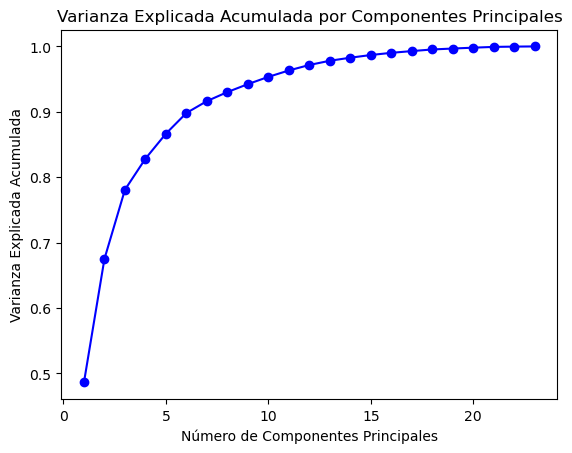

In [63]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), marker='o', color='b')

# Añadir etiquetas
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.show()

In [17]:
acum = []
for i in range(2,9):
    model = KMeans(
        n_clusters=i, # número de centroides
        n_init = 10, # número de semillas diferentes que va a probar el algoritmo
        max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
    )
    model.fit(data_clean)
    acum.append([i,model.inertia_])

In [18]:
tabla_codo = pd.DataFrame(acum,columns=["clusters", "Error"])
tabla_codo

,clusters,Error
0,2,2.156352e+06
1,3,1.531241e+06
2,4,1.120170e+06
3,5,9.667655e+05
4,6,8.633493e+05
5,7,7.864506e+05
6,8,7.125872e+05


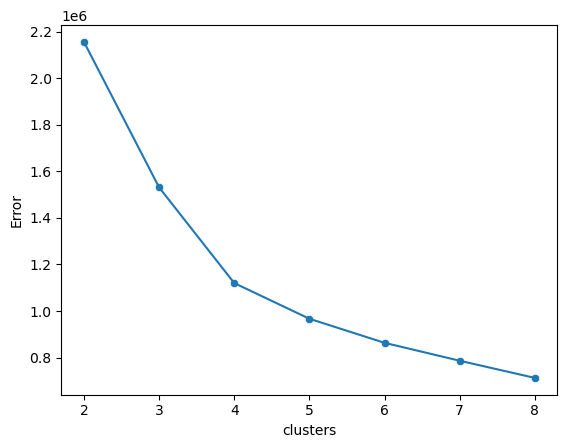

In [19]:
sns.lineplot(data = tabla_codo, x = "clusters", y = "Error")
sns.scatterplot(data = tabla_codo, x="clusters", y = "Error")
plt.show()

In [20]:
# genero modelo
model = KMeans(
    n_clusters=4, # número de centroides
    n_init = 10, # número de semillas diferentes que va a probar el algoritmo
    max_iter = 300 # número de iteraciones que va a hacer hasta encontrar el óptimo en cada semilla
)

model.fit(data_clean)

KMeans(n_clusters=4, n_init=10)

In [94]:
data_final = datas_sin[columnas_a_estandarizar]

In [96]:
data_final["cluster"] = model.labels_

C:\Users\redon\AppData\Local\Temp\ipykernel_2608\3376907824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final["cluster"] = model.labels_


In [100]:
data_final.groupby("cluster").mean()

,est_general_x,valor_de_mercado,edad,ritmo,chut,pase,regate,defensa_x,fisico,finalizacion,...,equilibrio,potencia_tiro,aguante,anticipacion,posicionamiento,vision_juego,marcaje,entrada,estirada,posicion_por
cluster,,,,,,,,,,,,,,,,,,,,,
0,63.917638,1.333151e+06,23.728093,72.067754,60.192344,55.394902,64.854908,31.713727,58.720938,61.098100,...,69.129984,63.203244,62.207359,28.831755,61.426138,56.871258,29.216535,28.048865,10.364575,10.374752
1,62.847386,9.376161e+05,24.210497,62.160872,36.473137,48.843534,52.313066,61.291763,66.665192,31.910457,...,60.030343,47.158602,64.793699,60.345336,39.807793,43.322831,60.486850,61.538230,10.385406,10.400549
2,70.851382,5.012290e+06,27.104245,69.796154,59.743127,66.580725,69.082012,61.035718,69.165983,55.880087,...,70.301003,67.850375,74.370780,62.004812,62.712463,65.566904,59.888294,59.688346,10.513168,10.550323
3,64.293175,1.665853e+06,26.106346,26.025313,30.975785,38.658845,35.854411,34.928054,34.931399,12.966748,...,43.272105,35.327675,30.618154,17.395926,12.301363,35.953318,14.767637,14.916421,65.147286,62.886315


In [115]:
data_final.shape

(180021, 24)

In [47]:
silhouette_avg = silhouette_score(data_clean, model.labels_)
print("La puntuación promedio de silueta es:", silhouette_avg)

La puntuación promedio de silueta es: 0.3902182233248368


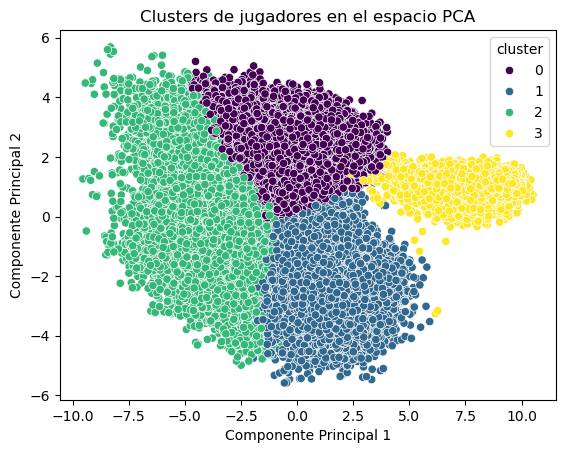

In [113]:
sns.scatterplot(x=0, y=1, hue="cluster", data=data_clean, palette='viridis')
plt.title("Clusters de jugadores en el espacio PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


In [ ]:
sample_silhouette_values = silhouette_samples(data_clean, model.labels_)

plt.plot(np.sort(sample_silhouette_values), np.arange(len(sample_silhouette_values)) / len(sample_silhouette_values))
plt.xlabel('Puntuación de Silueta')
plt.ylabel('Proporción de Datos')
plt.title('Gráfico de Densidad Acumulado de las Puntuaciones de Silueta')
plt.show()